# Apache Spark 3 for Data Engineering and Analytics with Python

In [ ]:
!pip install -U -q dvc dvc[gdrive]
!dvc pull

In [ ]:
!dvc status

Data and pipelines are up to date.


In [ ]:
!dvc commit && dvc push

In [ ]:
!dvc add /content/reco-tut-de/data/bronze/pyspark_tutorial/*.

In [ ]:
%cd /content
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!tar xf spark-3.0.0-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install -q pyspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

import findspark
findspark.init()

/content
     |████████████████████████████████| 212.4 MB 56 kB/s 
     |████████████████████████████████| 198 kB 66.0 MB/s 


In [ ]:
%cd "{project_path}"

/content/reco-tut-de


In [ ]:
!dvc add /content/reco-tut-de/data/bronze/pyspark_tutorial/salesdata/*.csv

⠋ Checking graph
Adding...:   0% 0/3 [00:00<?, ?file/s{'info': ''}]
!
          |0.00 [00:00,       ?it/s]
                                    
Querying cache in .dvc/cache:   0% 0.00/1.00 [00:00<?, ?file/s]
Querying cache in .dvc/cache:   0% 0.00/1.00 [00:00<?, ?file/s{'info': ''}]
                                                                           
Transferring:   0% 0/1 [00:00<?, ?file/s]
Transferring:   0% 0/1 [00:00<?, ?file/s{'info': ''}]
                                                     
.hmeUYtb7yNnfoZrwDnDZXP.tmp:   0% 0.00/8.65k [00:00<?, ?it/s]
.hmeUYtb7yNnfoZrwDnDZXP.tmp:   0% 0.00/8.65k [00:00<?, ?it/s{'info': ''}]
                                                                         
!
          |0.00 [00:00,       ?it/s]
                                    
!
          |0.00 [00:00,       ?it/s]
Adding...: 100% 3/3 [00:00<00:00, 34.28file/s{'info': ''}]

To track the changes with git, run:

	git add data/bronze/pyspark_tutorial/salesdata/Sales_February_2019.

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

spark

In [ ]:
type(spark)

pyspark.sql.session.SparkSession

In [ ]:
from pyspark.sql.functions import count

In [ ]:
sales_file = './data/bronze/pyspark_tutorial/sales_records.csv'

sales_df = (spark.read.format('csv').option('header','true').option('inferSchema','true').load(sales_file))

sales_df.select('Region', 'Country', 'Order ID').show(n=10, truncate=False)

+---------------------------------+---------------------+---------+
|Region                           |Country              |Order ID |
+---------------------------------+---------------------+---------+
|Middle East and North Africa     |Azerbaijan           |535113847|
|Central America and the Caribbean|Panama               |874708545|
|Sub-Saharan Africa               |Sao Tome and Principe|854349935|
|Sub-Saharan Africa               |Sao Tome and Principe|892836844|
|Central America and the Caribbean|Belize               |129280602|
|Europe                           |Denmark              |473105037|
|Europe                           |Germany              |754046475|
|Middle East and North Africa     |Turkey               |772153747|
|Europe                           |United Kingdom       |847788178|
|Asia                             |Kazakhstan           |471623599|
+---------------------------------+---------------------+---------+
only showing top 10 rows



In [ ]:
type(sales_df)

pyspark.sql.dataframe.DataFrame

In [ ]:
count_sales_df = (sales_df.select('Region', 'Country', 'Order ID')\
                  .groupby('Region', 'Country')\
                  .agg(count('Order ID').alias('Total Orders'))\
                  .orderBy('Total Orders', ascending=False)
                  )

count_sales_df.show(n=10, truncate=False)
print('Total Rows = ', count_sales_df.count())

+---------------------------------+--------------------------------+------------+
|Region                           |Country                         |Total Orders|
+---------------------------------+--------------------------------+------------+
|Middle East and North Africa     |Turkey                          |3           |
|Central America and the Caribbean|Saint Vincent and the Grenadines|2           |
|Europe                           |Italy                           |2           |
|Europe                           |Luxembourg                      |2           |
|North America                    |Mexico                          |2           |
|Middle East and North Africa     |Egypt                           |2           |
|Europe                           |Ukraine                         |2           |
|Asia                             |Kyrgyzstan                      |2           |
|Sub-Saharan Africa               |Eritrea                         |2           |
|Sub-Saharan Afr

### Spark UI

In [ ]:
# !wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
# !unzip ngrok-stable-linux-amd64.zip
# get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels

{"tunnels":[{"name":"command_line","uri":"/api/tunnels/command_line","public_url":"https://3a64-34-86-241-78.ngrok.io","proto":"https","config":{"addr":"http://localhost:4050","inspect":true},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0},"http":{"count":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0}}},{"name":"command_line (http)","uri":"/api/tunnels/command_line%20%28http%29","public_url":"http://3a64-34-86-241-78.ngrok.io","proto":"http","config":{"addr":"http://localhost:4050","inspect":true},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0},"http":{"count":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0}}}],"uri":"/api/tunnels"}


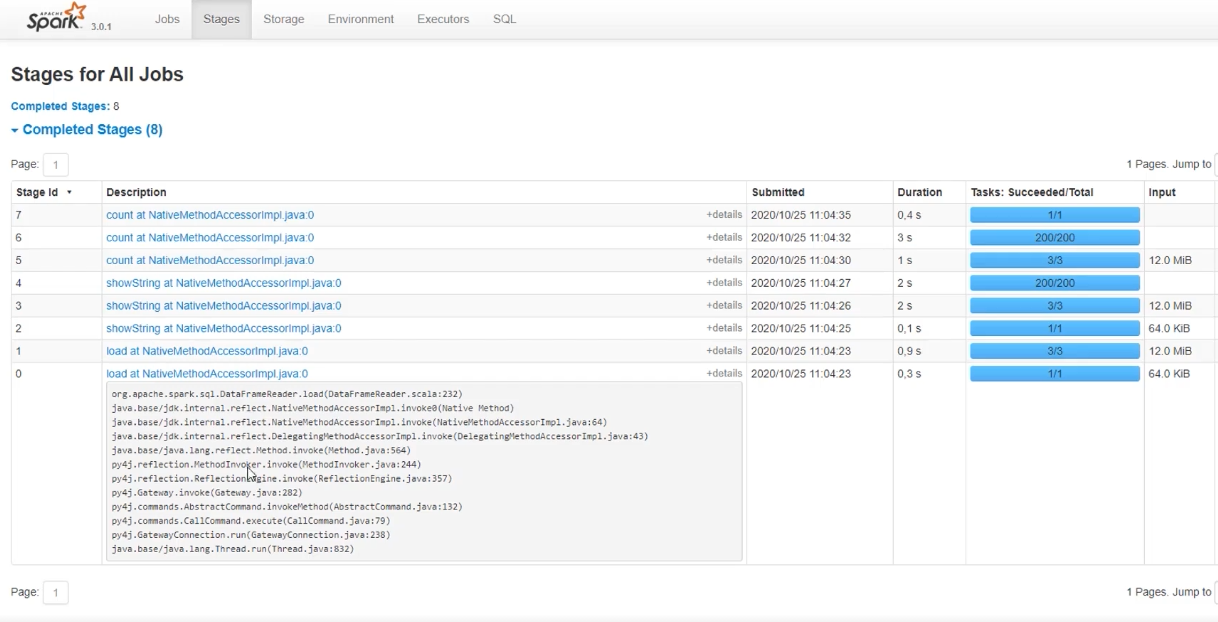

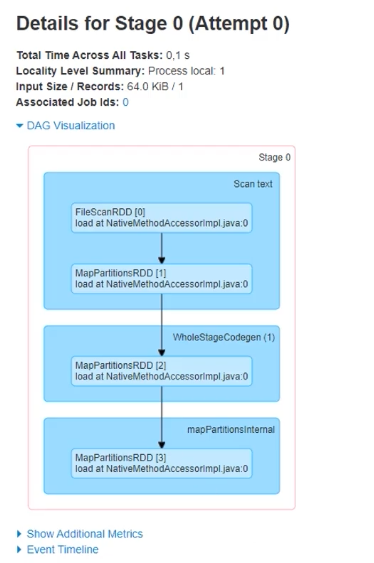

## RDDs

In [ ]:
words_list = "Spark makes life a lot easier and put me into good Spirits, Spark is too Awesome!".split(" ")

In [ ]:
type(words_list)

list

In [ ]:
print(words_list)

['Spark', 'makes', 'life', 'a', 'lot', 'easier', 'and', 'put', 'me', 'into', 'good', 'Spirits,', 'Spark', 'is', 'too', 'Awesome!']


In [ ]:
words_rdd = spark.sparkContext.parallelize(words_list)

In [ ]:
words_data = words_rdd.collect()

for word in words_data:
    print(word)

Spark
makes
life
a
lot
easier
and
put
me
into
good
Spirits,
Spark
is
too
Awesome!


In [ ]:
words_rdd.count()

16

In [ ]:
# task - count distinct words
# note - we will use distinct method and the count action on top of that
words_rdd.distinct().count()

15

In [ ]:
# task - from the above rdd, create an rdd that only contains words starting with S
# note - we will user the filter method with lambda, and then collect action on top of that
words_rdd.filter(lambda word: word.startswith("S")).collect()

['Spark', 'Spirits,', 'Spark']

In [ ]:
# task - create a list of tuples for each word, in which first element is the word itself
# second element is the first letter of the word, and third element is a bool whether first letter is S
words_trd_rdd = words_rdd.map(lambda word: (word, word[0], word.startswith("S")))

for element in words_trd_rdd.collect():
    print(element)

('Spark', 'S', True)
('makes', 'm', False)
('life', 'l', False)
('a', 'a', False)
('lot', 'l', False)
('easier', 'e', False)
('and', 'a', False)
('put', 'p', False)
('me', 'm', False)
('into', 'i', False)
('good', 'g', False)
('Spirits,', 'S', True)
('Spark', 'S', True)
('is', 'i', False)
('too', 't', False)
('Awesome!', 'A', False)


In [ ]:
# task - create an rdd for a list of named tuples
# and first sort by key and by value

cntry_list = [('India',10), ('USA',15), ('Japan',25)]
cntry_rdd = spark.sparkContext.parallelize(cntry_list)

srtd_cntry_rdd = cntry_rdd.sortByKey().collect()

for element in srtd_cntry_rdd:
    print(element)

('India', 10)
('Japan', 25)
('USA', 15)


In [ ]:
rsrtd_cntry_rdd = cntry_rdd.map(lambda x: (x[1], x[0])).sortByKey().collect()

for element in rsrtd_cntry_rdd:
    print(element)

(10, 'India')
(15, 'USA')
(25, 'Japan')


In [ ]:
def wordLengthReducer(leftWord, rightWord):
    if len(leftWord) > len(rightWord):
        return leftWord
    else:
        return rightWord


words_rdd.reduce(wordLengthReducer)

Awesome!


### Temperature conversion task

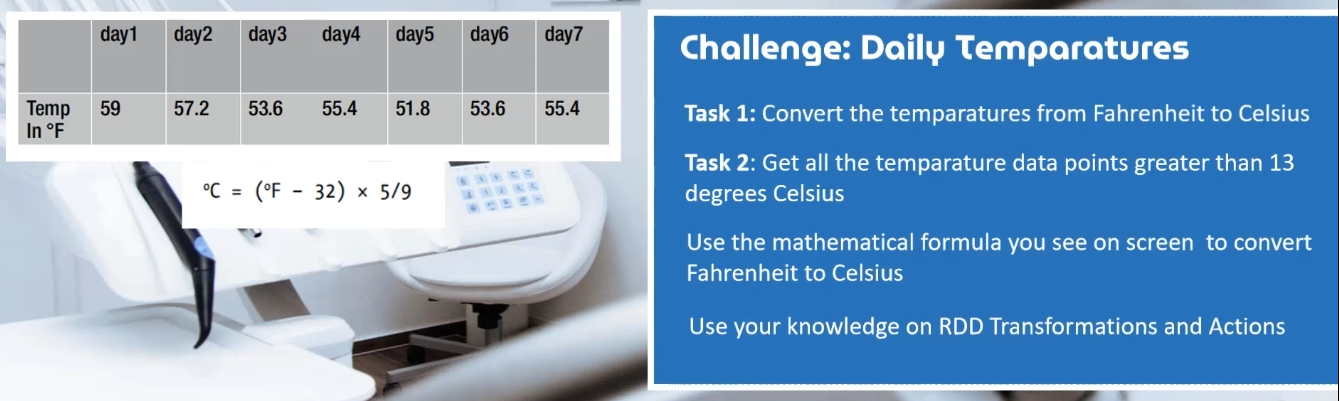

In [ ]:
def f2c(f):
    return (f-32)*(5/9)

temp_list = [59, 57.2, 53.6, 55.4, 51.8, 53.6, 55.4]

temp_rdd = spark.sparkContext.parallelize(temp_list)

temp_rdd.map(f2c).filter(lambda x: x>=13).collect()

[15.0, 14.000000000000002, 13.0, 13.0]

### XYZ Research

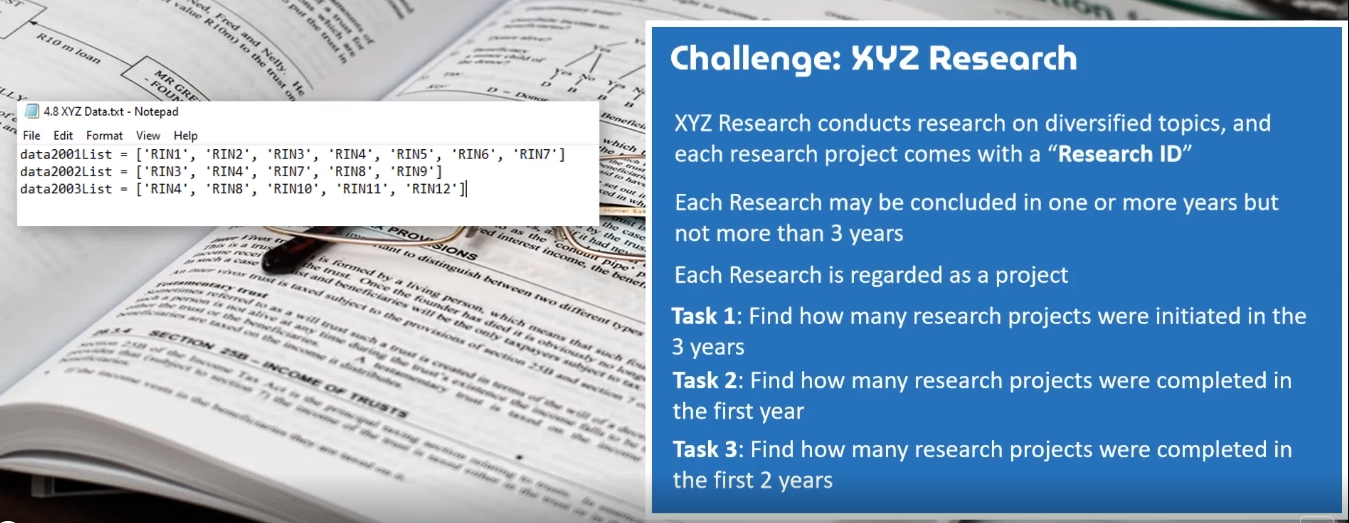

In [ ]:
!cat ./extras/XYZ\ Research.txt

XYZ Research
RDD API - XYZ - Research

Imagine working as a Data Scientist for a company called XYZ Research that performs research on many diversified topics, and each research project comes with a Research ID.

Each Research can be completed within a year and beyond.

Take a look at the data below;

data2001List = ['RIN1', 'RIN2', 'RIN3', 'RIN4', 'RIN5', 'RIN6', 'RIN7']

data2002List = ['RIN3', 'RIN4', 'RIN7', 'RIN8', 'RIN9']

data2003List = ['RIN4', 'RIN8', 'RIN10', 'RIN11', 'RIN12']

The above-mentioned data indicates the number of projects that have been completed over a period of 3 years.

In 2001, there were at least 7 research projects [RIN1 - 7] that were initiated, RIN8 and RIN9 were initiated in 2002, while RIN10, RIN11, and RIN12 were initiated in 2003.

RIN3 also appears in 2002, meaning that the research project has actually spanned over 2 years, RIN4, on the other hand, appears in 2001, 2002, and 2003 which means that the research project spanned over 3 years.

XYZ Resea

In [ ]:
data2001List = ['RIN1', 'RIN2', 'RIN3', 'RIN4', 'RIN5', 'RIN6', 'RIN7']
data2002List = ['RIN3', 'RIN4', 'RIN7', 'RIN8', 'RIN9']
data2003List = ['RIN4', 'RIN8', 'RIN10', 'RIN11', 'RIN12']

In [ ]:
data2001RDD = spark.sparkContext.parallelize(data2001List)
data2002RDD = spark.sparkContext.parallelize(data2002List)
data2003RDD = spark.sparkContext.parallelize(data2003List)

In [ ]:
# How many research projects were initiated in the three years?
union20012002 = data2001RDD.union(data2002RDD)
unionAll = union20012002.union(data2003RDD)
unionAll.distinct().count()

12

In [ ]:
# How many projects were completed in the first year?
firstYearCompletionRDD = data2001RDD.subtract(data2002RDD)
firstYearCompletionRDD.collect()

['RIN1', 'RIN2', 'RIN5', 'RIN6']

In [ ]:
# How many projects were completed in the first two years?
union20012002.subtract(data2003RDD).distinct().collect()

['RIN1', 'RIN9', 'RIN6', 'RIN2', 'RIN3', 'RIN5', 'RIN7']

## Structured API - Spark Dataframe

In [ ]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType, DateType
from pyspark.sql.functions import date_format

In [ ]:
schema = StructType([
                     StructField("Order ID", StringType(), True),
                     StructField("Product", StringType(), True),
                     StructField("Quantity Ordered", IntegerType(), True),
                     StructField("Price Each", FloatType(), True),
                     StructField("Order Date", DateType(), True),
                     StructField("Purchase Address", StringType(), True),
])

In [ ]:
sales_data_fpath = './data/bronze/pyspark_tutorial/salesdata'
sales_raw_df = (spark.read.format('csv')\
                .option('header', True)\
                .schema(schema)\
                .load(sales_data_fpath)
)
sales_raw_df.show(10)

+--------+--------------------+----------------+----------+----------+--------------------+
|Order ID|             Product|Quantity Ordered|Price Each|Order Date|    Purchase Address|
+--------+--------------------+----------------+----------+----------+--------------------+
|  162009|              iPhone|               1|     700.0|      null|942 Church St, Au...|
|  162009|Lightning Chargin...|               1|     14.95|      null|942 Church St, Au...|
|  162009|    Wired Headphones|               2|     11.99|      null|942 Church St, Au...|
|  162010|Bose SoundSport H...|               1|     99.99|      null|261 10th St, San ...|
|  162011|34in Ultrawide Mo...|               1|    379.99|      null|764 13th St, San ...|
|  162012|AA Batteries (4-p...|               1|      3.84|      null|187 Ridge St, San...|
|  162013|34in Ultrawide Mo...|               1|    379.99|      null|904 Main St, Aust...|
|  162014|USB-C Charging Cable|               1|     11.95|      null|10 13th St

In [ ]:
sales_raw_df.show(10, truncate=False)

+--------+--------------------------+----------------+----------+----------+-------------------------------------+
|Order ID|Product                   |Quantity Ordered|Price Each|Order Date|Purchase Address                     |
+--------+--------------------------+----------------+----------+----------+-------------------------------------+
|162009  |iPhone                    |1               |700.0     |null      |942 Church St, Austin, TX 73301      |
|162009  |Lightning Charging Cable  |1               |14.95     |null      |942 Church St, Austin, TX 73301      |
|162009  |Wired Headphones          |2               |11.99     |null      |942 Church St, Austin, TX 73301      |
|162010  |Bose SoundSport Headphones|1               |99.99     |null      |261 10th St, San Francisco, CA 94016 |
|162011  |34in Ultrawide Monitor    |1               |379.99    |null      |764 13th St, San Francisco, CA 94016 |
|162012  |AA Batteries (4-pack)     |1               |3.84      |null      |187 

In [ ]:
sales_raw_df.printSchema()

root
 |-- Order ID: string (nullable = true)
 |-- Product: string (nullable = true)
 |-- Quantity Ordered: integer (nullable = true)
 |-- Price Each: float (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Purchase Address: string (nullable = true)



In [ ]:
sales_raw_df.count()

25049

In [ ]:
sales_raw_df.columns

['Order ID',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address']

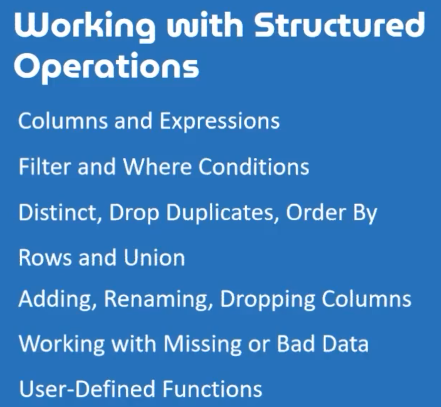

### Adding, renaming and dropping columns

In [ ]:
from pyspark.sql.functions import round, expr, year

In [ ]:
sales_raw_df.withColumn('New Price Each', expr('`Price Each` * 0.10 + `Price Each`')).show(10)

+--------+--------------------+----------------+----------+--------------+--------------------+------------------+
|Order ID|             Product|Quantity Ordered|Price Each|    Order Date|    Purchase Address|    New Price Each|
+--------+--------------------+----------------+----------+--------------+--------------------+------------------+
|  162009|              iPhone|               1|     700.0|03/28/19 20:59|942 Church St, Au...|             770.0|
|  162009|Lightning Chargin...|               1|     14.95|03/28/19 20:59|942 Church St, Au...|16.444999790191652|
|  162009|    Wired Headphones|               2|     11.99|03/28/19 20:59|942 Church St, Au...| 13.18899974822998|
|  162010|Bose SoundSport H...|               1|     99.99|03/17/19 05:39|261 10th St, San ...|109.98899765014649|
|  162011|34in Ultrawide Mo...|               1|    379.99|03/10/19 00:01|764 13th St, San ...| 417.9889892578125|
|  162012|AA Batteries (4-p...|               1|      3.84|03/20/19 21:33|187 Ri

In [ ]:
sales_df1 = (sales_raw_df\
             .withColumn('New Price Each', expr('`Price Each` * 0.10 + `Price Each`'))\
            #  .withColumn('Order Year', year('`Order Date`'))\
             .withColumnRenamed('Purchase Address','Address')\
             .withColumn('Price x10', round('New Price Each',2))\
             .drop('New Price Each')
             )
sales_df1.show(10)

+--------+--------------------+----------------+----------+----------+--------------------+---------+
|Order ID|             Product|Quantity Ordered|Price Each|Order Date|             Address|Price x10|
+--------+--------------------+----------------+----------+----------+--------------------+---------+
|  162009|              iPhone|               1|     700.0|      null|942 Church St, Au...|    770.0|
|  162009|Lightning Chargin...|               1|     14.95|      null|942 Church St, Au...|    16.44|
|  162009|    Wired Headphones|               2|     11.99|      null|942 Church St, Au...|    13.19|
|  162010|Bose SoundSport H...|               1|     99.99|      null|261 10th St, San ...|   109.99|
|  162011|34in Ultrawide Mo...|               1|    379.99|      null|764 13th St, San ...|   417.99|
|  162012|AA Batteries (4-p...|               1|      3.84|      null|187 Ridge St, San...|     4.22|
|  162013|34in Ultrawide Mo...|               1|    379.99|      null|904 Main St,

### Handle bad data

In [ ]:
from pyspark.sql import Row
from pyspark.sql.functions import col

In [ ]:
bad_movies_list = [Row(None, None, None),
                   Row(None, None, 2020),
                   Row("John Doe", "Awesome Movie", None),
                   Row(None, "Awesome Movie", 2021),
                   Row("Mary Jane", None, 2019),
                   Row("Vikter Duplaix", "Not another teen movie", 2001)]
bad_movies_list                   

[<Row(None, None, None)>,
 <Row(None, None, 2020)>,
 <Row('John Doe', 'Awesome Movie', None)>,
 <Row(None, 'Awesome Movie', 2021)>,
 <Row('Mary Jane', None, 2019)>,
 <Row('Vikter Duplaix', 'Not another teen movie', 2001)>]

In [ ]:
bad_movies_columns = ['actor_name', 'movie_title', 'producer_year']

In [ ]:
bad_movies_df = spark.createDataFrame(bad_movies_list, schema=bad_movies_columns)
bad_movies_df.show()

+--------------+--------------------+-------------+
|    actor_name|         movie_title|producer_year|
+--------------+--------------------+-------------+
|          null|                null|         null|
|          null|                null|         2020|
|      John Doe|       Awesome Movie|         null|
|          null|       Awesome Movie|         2021|
|     Mary Jane|                null|         2019|
|Vikter Duplaix|Not another teen ...|         2001|
+--------------+--------------------+-------------+



In [ ]:
bad_movies_df.na.drop().show()

+--------------+--------------------+-------------+
|    actor_name|         movie_title|producer_year|
+--------------+--------------------+-------------+
|Vikter Duplaix|Not another teen ...|         2001|
+--------------+--------------------+-------------+



In [ ]:
bad_movies_df.na.drop('all').show()

+--------------+--------------------+-------------+
|    actor_name|         movie_title|producer_year|
+--------------+--------------------+-------------+
|          null|                null|         2020|
|      John Doe|       Awesome Movie|         null|
|          null|       Awesome Movie|         2021|
|     Mary Jane|                null|         2019|
|Vikter Duplaix|Not another teen ...|         2001|
+--------------+--------------------+-------------+



In [ ]:
bad_movies_df.filter(col('actor_name').isNull()!=True).show()

+--------------+--------------------+-------------+
|    actor_name|         movie_title|producer_year|
+--------------+--------------------+-------------+
|      John Doe|       Awesome Movie|         null|
|     Mary Jane|                null|         2019|
|Vikter Duplaix|Not another teen ...|         2001|
+--------------+--------------------+-------------+



In [ ]:
bad_movies_df.describe('producer_year').show()

+-------+-----------------+
|summary|    producer_year|
+-------+-----------------+
|  count|                4|
|   mean|          2015.25|
| stddev|9.535023160258536|
|    min|             2001|
|    max|             2021|
+-------+-----------------+



## Data Preparation and Cleansing

In [ ]:
from pyspark.sql import SparkSession, Row
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType, DateType
from pyspark.sql.functions import date_format, col, split, to_timestamp, month, year

In [ ]:
spark.stop()

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()
        
spark

In [ ]:
schema = StructType([
                     StructField("Order ID", StringType(), True),
                     StructField("Product", StringType(), True),
                     StructField("Quantity Ordered", StringType(), True),
                     StructField("Price Each", StringType(), True),
                     StructField("Order Date", StringType(), True),
                     StructField("Purchase Address", StringType(), True),
])

In [ ]:
sales_data_fpath = './data/bronze/pyspark_tutorial/salesdata'
sales_raw_df = (spark.read.format('csv')\
                .option('header', True)\
                .schema(schema)\
                .load(sales_data_fpath)
)
sales_raw_df.show(10)

+--------+--------------------+----------------+----------+--------------+--------------------+
|Order ID|             Product|Quantity Ordered|Price Each|    Order Date|    Purchase Address|
+--------+--------------------+----------------+----------+--------------+--------------------+
|  162009|              iPhone|               1|       700|03/28/19 20:59|942 Church St, Au...|
|  162009|Lightning Chargin...|               1|     14.95|03/28/19 20:59|942 Church St, Au...|
|  162009|    Wired Headphones|               2|     11.99|03/28/19 20:59|942 Church St, Au...|
|  162010|Bose SoundSport H...|               1|     99.99|03/17/19 05:39|261 10th St, San ...|
|  162011|34in Ultrawide Mo...|               1|    379.99|03/10/19 00:01|764 13th St, San ...|
|  162012|AA Batteries (4-p...|               1|      3.84|03/20/19 21:33|187 Ridge St, San...|
|  162013|34in Ultrawide Mo...|               1|    379.99|03/15/19 23:05|904 Main St, Aust...|
|  162014|USB-C Charging Cable|         

In [ ]:
sales_raw_df.filter(col('Order ID').isNull()==True).show(10)

+--------+-------+----------------+----------+----------+----------------+
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
+--------+-------+----------------+----------+----------+----------------+
|    null|   null|            null|      null|      null|            null|
|    null|   null|            null|      null|      null|            null|
|    null|   null|            null|      null|      null|            null|
|    null|   null|            null|      null|      null|            null|
|    null|   null|            null|      null|      null|            null|
|    null|   null|            null|      null|      null|            null|
|    null|   null|            null|      null|      null|            null|
|    null|   null|            null|      null|      null|            null|
|    null|   null|            null|      null|      null|            null|
|    null|   null|            null|      null|      null|            null|
+--------+-------+-------

In [ ]:
sales_raw_df = sales_raw_df.na.drop('any')

In [ ]:
sales_raw_df.filter(col('Order ID').isNull()==True).show(10)

+--------+-------+----------------+----------+----------+----------------+
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
+--------+-------+----------------+----------+----------+----------------+
+--------+-------+----------------+----------+----------+----------------+



In [ ]:
sales_raw_df.describe(sales_raw_df.columns).show()

+-------+------------------+------------+-------------------+------------------+--------------+--------------------+
|summary|          Order ID|     Product|   Quantity Ordered|        Price Each|    Order Date|    Purchase Address|
+-------+------------------+------------+-------------------+------------------+--------------+--------------------+
|  count|             24985|       24985|              24985|             24985|         24985|               24985|
|   mean|160109.64089195477|        null| 1.1223630384214325|185.08588674106116|          null|                null|
| stddev|11990.632184550177|        null|0.44157602555670555|331.35548106383914|          null|                null|
|    min|            141234|20in Monitor|                  1|            109.99|01/01/19 03:07|1 11th St, Atlant...|
|    max|          Order ID|      iPhone|   Quantity Ordered|        Price Each|    Order Date|    Purchase Address|
+-------+------------------+------------+-------------------+---

In [ ]:
sales_raw_df.filter(col('Order ID')=='Order ID').show(10)

+--------+-------+----------------+----------+----------+----------------+
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
+--------+-------+----------------+----------+----------+----------------+
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
+--------+-------+-------

In [ ]:
sales_temp_df = sales_raw_df.distinct() #remove duplicate records
sales_temp_df = sales_temp_df.filter(col('Order ID')!='Order ID')
sales_temp_df.show(10)

+--------+--------------------+----------------+----------+--------------+--------------------+
|Order ID|             Product|Quantity Ordered|Price Each|    Order Date|    Purchase Address|
+--------+--------------------+----------------+----------+--------------+--------------------+
|  162020|  LG Washing Machine|               1|     600.0|03/26/19 18:17|616 Jackson St, D...|
|  162310|AAA Batteries (4-...|               2|      2.99|03/12/19 11:42|782 Adams St, Bos...|
|  162533|              iPhone|               1|       700|03/12/19 19:48|361 Ridge St, San...|
|  162610|USB-C Charging Cable|               1|     11.95|03/02/19 15:59|90 Hill St, San F...|
|  162805|AAA Batteries (4-...|               2|      2.99|03/11/19 23:15|40 14th St, Bosto...|
|  162857|34in Ultrawide Mo...|               1|    379.99|03/05/19 00:08|15 Madison St, Lo...|
|  162906|    27in FHD Monitor|               1|    149.99|03/07/19 18:49|993 2nd St, Bosto...|
|  163169|    Wired Headphones|         

In [ ]:
sales_temp_df.filter(col('Order ID')=='Order ID').show(10)

+--------+-------+----------------+----------+----------+----------------+
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
+--------+-------+----------------+----------+----------+----------------+
+--------+-------+----------------+----------+----------+----------------+



In [ ]:
sales_temp_df.describe(sales_temp_df.columns).show()

+-------+------------------+------------+-------------------+------------------+--------------+--------------------+
|summary|          Order ID|     Product|   Quantity Ordered|        Price Each|    Order Date|    Purchase Address|
+-------+------------------+------------+-------------------+------------------+--------------+--------------------+
|  count|             24899|       24899|              24899|             24899|         24899|               24899|
|   mean|160105.87891079963|        null|  1.122494879312422|185.22690630145823|          null|                null|
| stddev|11992.738608115866|        null|0.44182812274830796|331.53390315859014|          null|                null|
|    min|            141234|20in Monitor|                  1|            109.99|01/01/19 03:07|1 11th St, Atlant...|
|    max|            176557|      iPhone|                  7|            999.99|04/01/19 03:21|999 Walnut St, Sa...|
+-------+------------------+------------+-------------------+---

In [ ]:
sales_temp_df.select('Purchase Address').show(10, False)

+--------------------------------------+
|Purchase Address                      |
+--------------------------------------+
|616 Jackson St, Dallas, TX 75001      |
|782 Adams St, Boston, MA 02215        |
|361 Ridge St, San Francisco, CA 94016 |
|90 Hill St, San Francisco, CA 94016   |
|40 14th St, Boston, MA 02215          |
|15 Madison St, Los Angeles, CA 90001  |
|993 2nd St, Boston, MA 02215          |
|839 Cherry St, San Francisco, CA 94016|
|496 Church St, San Francisco, CA 94016|
|49 South St, Dallas, TX 75001         |
+--------------------------------------+
only showing top 10 rows



In [ ]:
sales_temp_df.select('Purchase Address', split(col('Purchase Address'), ',')).show(10, False)

+--------------------------------------+------------------------------------------+
|Purchase Address                      |split(Purchase Address, ,, -1)            |
+--------------------------------------+------------------------------------------+
|616 Jackson St, Dallas, TX 75001      |[616 Jackson St,  Dallas,  TX 75001]      |
|782 Adams St, Boston, MA 02215        |[782 Adams St,  Boston,  MA 02215]        |
|361 Ridge St, San Francisco, CA 94016 |[361 Ridge St,  San Francisco,  CA 94016] |
|90 Hill St, San Francisco, CA 94016   |[90 Hill St,  San Francisco,  CA 94016]   |
|40 14th St, Boston, MA 02215          |[40 14th St,  Boston,  MA 02215]          |
|15 Madison St, Los Angeles, CA 90001  |[15 Madison St,  Los Angeles,  CA 90001]  |
|993 2nd St, Boston, MA 02215          |[993 2nd St,  Boston,  MA 02215]          |
|839 Cherry St, San Francisco, CA 94016|[839 Cherry St,  San Francisco,  CA 94016]|
|496 Church St, San Francisco, CA 94016|[496 Church St,  San Francisco,  CA 

In [ ]:
sales_temp_df.select('Purchase Address', split(col('Purchase Address'), ',').getItem(1)).show(10, False)

+--------------------------------------+---------------------------------+
|Purchase Address                      |split(Purchase Address, ,, -1)[1]|
+--------------------------------------+---------------------------------+
|616 Jackson St, Dallas, TX 75001      | Dallas                          |
|782 Adams St, Boston, MA 02215        | Boston                          |
|361 Ridge St, San Francisco, CA 94016 | San Francisco                   |
|90 Hill St, San Francisco, CA 94016   | San Francisco                   |
|40 14th St, Boston, MA 02215          | Boston                          |
|15 Madison St, Los Angeles, CA 90001  | Los Angeles                     |
|993 2nd St, Boston, MA 02215          | Boston                          |
|839 Cherry St, San Francisco, CA 94016| San Francisco                   |
|496 Church St, San Francisco, CA 94016| San Francisco                   |
|49 South St, Dallas, TX 75001         | Dallas                          |
+------------------------

In [ ]:
sales_temp_df.select('Purchase Address', split(col('Purchase Address'), ',').getItem(2)).show(10, False)

+--------------------------------------+---------------------------------+
|Purchase Address                      |split(Purchase Address, ,, -1)[2]|
+--------------------------------------+---------------------------------+
|616 Jackson St, Dallas, TX 75001      | TX 75001                        |
|782 Adams St, Boston, MA 02215        | MA 02215                        |
|361 Ridge St, San Francisco, CA 94016 | CA 94016                        |
|90 Hill St, San Francisco, CA 94016   | CA 94016                        |
|40 14th St, Boston, MA 02215          | MA 02215                        |
|15 Madison St, Los Angeles, CA 90001  | CA 90001                        |
|993 2nd St, Boston, MA 02215          | MA 02215                        |
|839 Cherry St, San Francisco, CA 94016| CA 94016                        |
|496 Church St, San Francisco, CA 94016| CA 94016                        |
|49 South St, Dallas, TX 75001         | TX 75001                        |
+------------------------

In [ ]:
sales_temp_df = (sales_temp_df\
                 .withColumn('City', split(col('Purchase Address'), ',').getItem(1))\
                 .withColumn('State', split(split(col('Purchase Address'),',').getItem(2), ' ').getItem(1))
                 )

sales_temp_df.show(10, False)

+--------+------------------------+----------------+----------+--------------+--------------------------------------+--------------+-----+
|Order ID|Product                 |Quantity Ordered|Price Each|Order Date    |Purchase Address                      |City          |State|
+--------+------------------------+----------------+----------+--------------+--------------------------------------+--------------+-----+
|162020  |LG Washing Machine      |1               |600.0     |03/26/19 18:17|616 Jackson St, Dallas, TX 75001      | Dallas       |TX   |
|162310  |AAA Batteries (4-pack)  |2               |2.99      |03/12/19 11:42|782 Adams St, Boston, MA 02215        | Boston       |MA   |
|162533  |iPhone                  |1               |700       |03/12/19 19:48|361 Ridge St, San Francisco, CA 94016 | San Francisco|CA   |
|162610  |USB-C Charging Cable    |1               |11.95     |03/02/19 15:59|90 Hill St, San Francisco, CA 94016   | San Francisco|CA   |
|162805  |AAA Batteries (4-

In [ ]:
sales_temp_df = (sales_temp_df\
                 .withColumn('OrderID', col('Order ID').cast(IntegerType()))\
                 .withColumn('Quantity', col('Quantity Ordered').cast(FloatType()))\
                 .withColumn('Price', col('Price Each').cast(FloatType()))\
                 .withColumn('OrderDate', to_timestamp(col('Order Date'), 'MM/dd/yy HH:mm'))\
                 .withColumnRenamed('Purchase Address', 'StoreAddress')\
                 .drop('Order ID')\
                 .drop('Quantity Ordered')\
                 .drop('Price Each')\
                 .drop('Order Date')\
                 )

sales_temp_df.show(10, False)

+------------------------+--------------------------------------+--------------+-----+-------+--------+------+-------------------+
|Product                 |StoreAddress                          |City          |State|OrderID|Quantity|Price |OrderDate          |
+------------------------+--------------------------------------+--------------+-----+-------+--------+------+-------------------+
|LG Washing Machine      |616 Jackson St, Dallas, TX 75001      | Dallas       |TX   |162020 |1.0     |600.0 |2019-03-26 18:17:00|
|AAA Batteries (4-pack)  |782 Adams St, Boston, MA 02215        | Boston       |MA   |162310 |2.0     |2.99  |2019-03-12 11:42:00|
|iPhone                  |361 Ridge St, San Francisco, CA 94016 | San Francisco|CA   |162533 |1.0     |700.0 |2019-03-12 19:48:00|
|USB-C Charging Cable    |90 Hill St, San Francisco, CA 94016   | San Francisco|CA   |162610 |1.0     |11.95 |2019-03-02 15:59:00|
|AAA Batteries (4-pack)  |40 14th St, Boston, MA 02215          | Boston       |MA 

In [ ]:
sales_temp_df = (sales_temp_df\
                 .withColumn('ReportYear', year(col('OrderDate')))\
                 .withColumn('Month', month(col('OrderDate')))
                 )
sales_temp_df.show(10, False)

+------------------------+--------------------------------------+--------------+-----+-------+--------+------+-------------------+----------+-----+
|Product                 |StoreAddress                          |City          |State|OrderID|Quantity|Price |OrderDate          |ReportYear|Month|
+------------------------+--------------------------------------+--------------+-----+-------+--------+------+-------------------+----------+-----+
|LG Washing Machine      |616 Jackson St, Dallas, TX 75001      | Dallas       |TX   |162020 |1.0     |600.0 |2019-03-26 18:17:00|2019      |3    |
|AAA Batteries (4-pack)  |782 Adams St, Boston, MA 02215        | Boston       |MA   |162310 |2.0     |2.99  |2019-03-12 11:42:00|2019      |3    |
|iPhone                  |361 Ridge St, San Francisco, CA 94016 | San Francisco|CA   |162533 |1.0     |700.0 |2019-03-12 19:48:00|2019      |3    |
|USB-C Charging Cable    |90 Hill St, San Francisco, CA 94016   | San Francisco|CA   |162610 |1.0     |11.95 |20

In [ ]:
ordered_columns = ['OrderID', 'Product', 'Quantity', 'Price', 'OrderDate',
                   'StoreAddress', 'City', 'ReportYear', 'Month']

sales_temp_df = sales_temp_df.select(ordered_columns)

sales_temp_df.show(10, False)

+-------+------------------------+--------+------+-------------------+--------------------------------------+--------------+----------+-----+
|OrderID|Product                 |Quantity|Price |OrderDate          |StoreAddress                          |City          |ReportYear|Month|
+-------+------------------------+--------+------+-------------------+--------------------------------------+--------------+----------+-----+
|162020 |LG Washing Machine      |1.0     |600.0 |2019-03-26 18:17:00|616 Jackson St, Dallas, TX 75001      | Dallas       |2019      |3    |
|162310 |AAA Batteries (4-pack)  |2.0     |2.99  |2019-03-12 11:42:00|782 Adams St, Boston, MA 02215        | Boston       |2019      |3    |
|162533 |iPhone                  |1.0     |700.0 |2019-03-12 19:48:00|361 Ridge St, San Francisco, CA 94016 | San Francisco|2019      |3    |
|162610 |USB-C Charging Cable    |1.0     |11.95 |2019-03-02 15:59:00|90 Hill St, San Francisco, CA 94016   | San Francisco|2019      |3    |
|16280

In [ ]:
!mkdir -p /content/temp
output_path = '/content/temp'
sales_temp_df.write.mode('overwrite').partitionBy('ReportYear','Month').parquet(output_path)